# Model Evaluation

## Predicting Credit Risk

## About The Dataset: German Credit Risk

## 1. Data Cleaning and Preprocessing

## Importing Useful Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Inspecting the data: Check for any missing or duplicate values.

## Loading Data

In [3]:
data=pd.read_csv('german_credit_data.csv')

## Inspecting the data: Check for any missing or duplicate values

In [4]:
data.shape

(1000, 11)

In [5]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
data=data.drop(columns=['Unnamed: 0'])

In [7]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [9]:
#Summary measures of statistics
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [10]:
print ("Are there any missing values?", data.isnull().values.any())

Are there any missing values? True


In [11]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Visualize missing values using heat map

<Axes: >

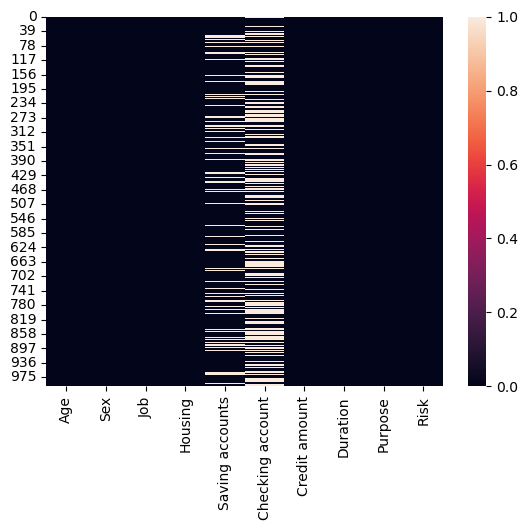

In [12]:
sns.heatmap(data.isnull())

### Finding the percentage of missing values

In [13]:
per_missing=data.isnull().sum()*100/len(data)
per_missing

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

### Handling Missing Values: Applying Mode Imputation To Categorical Variables

In [14]:
data['Saving accounts'].fillna(data['Saving accounts'].mode()[0],inplace=True)

In [15]:
data['Checking account'].fillna(data['Checking account'].mode()[0],inplace=True)

In [16]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [17]:
data.shape

(1000, 10)

In [18]:
print("Number of rows", data.shape[0])
print("Number of Columns", data.shape [1])

Number of rows 1000
Number of Columns 10


### Check For Duplicates

In [19]:
dup_data=data.duplicated().any()

In [20]:
print("Are there any duplicate values?", dup_data)

Are there any duplicate values? False


### Converting Job (Numeric) to be Categorical

In [21]:
# Ensure the 'Job' column is of integer type
data['Job'] = data['Job'].astype(int)

# Define a function to categorize the 'Job' variable
def categorize_job(job_value):
    if job_value == 0:
        return 'unskilled and non-resident'
    elif job_value == 1:
        return 'unskilled and resident'
    elif job_value == 2:
        return 'skilled'
    elif job_value == 3:
        return 'highly skilled'
    else:
        return 'unknown'  # For unexpected values, if any

# Apply the function to the 'Job' column
data['Job'] = data['Job'].apply(categorize_job)

# Ensure 'Job' is of categorical data type
data['Job'] = data['Job'].astype('object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.3+ KB


In [23]:
data['Job']

0                     skilled
1                     skilled
2      unskilled and resident
3                     skilled
4                     skilled
                ...          
995    unskilled and resident
996            highly skilled
997                   skilled
998                   skilled
999                   skilled
Name: Job, Length: 1000, dtype: object

In [24]:
# Check unique levels in the 'Job' column
print("Unique levels in 'Job':", data['Job'].unique())

# Check frequency of each level in the 'Job' column
print("\nFrequency of each level in 'Job':")
print(data['Job'].value_counts())

Unique levels in 'Job': ['skilled' 'unskilled and resident' 'highly skilled'
 'unskilled and non-resident']

Frequency of each level in 'Job':
Job
skilled                       630
unskilled and resident        200
highly skilled                148
unskilled and non-resident     22
Name: count, dtype: int64


# 2. Exploring Some Variables

In [25]:
#Let's start looking through target variable and their distribuition

In [26]:
# Count the occurrences of each of the Risk
Risk_counts = data['Risk'].value_counts()

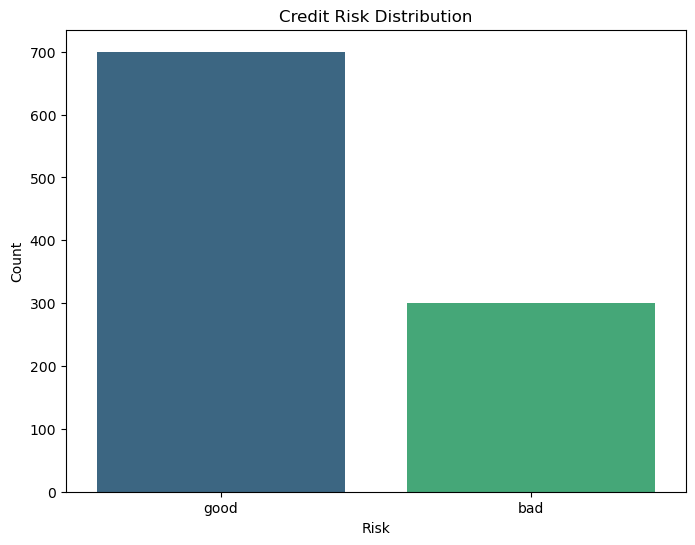

In [27]:
# Plot the bar graph for Credit Risk
plt.figure(figsize=(8, 6))
sns.barplot(x=Risk_counts.index, y=Risk_counts.values, palette="viridis")
plt.title("Credit Risk Distribution")
plt.xlabel("Risk")
plt.ylabel("Count")
plt.show()

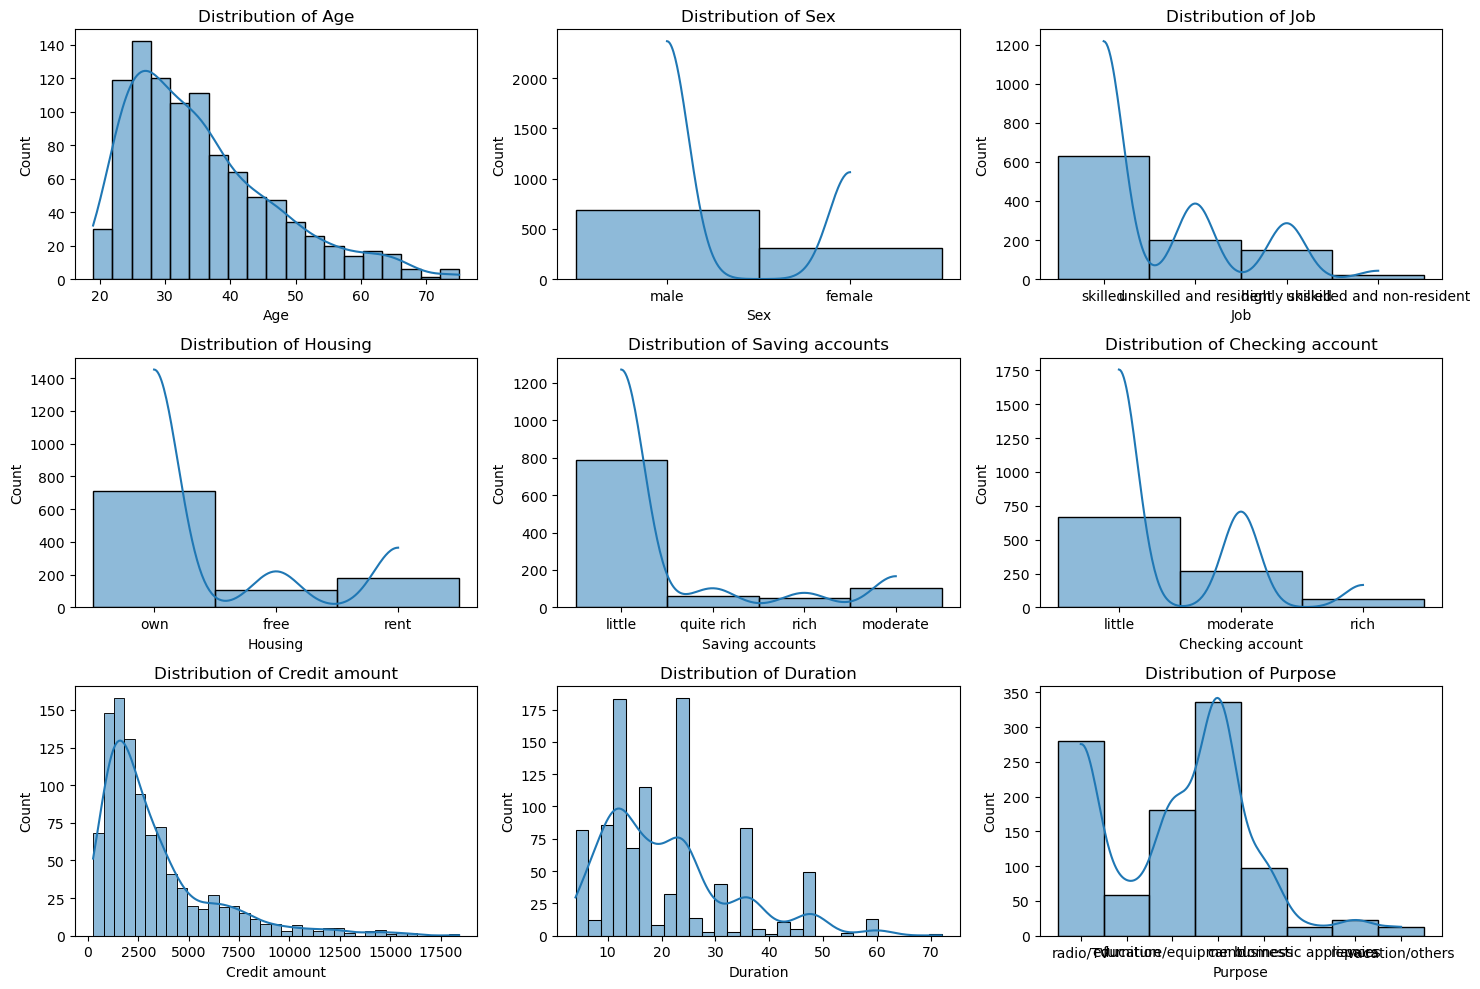

In [28]:
# Visualizations
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

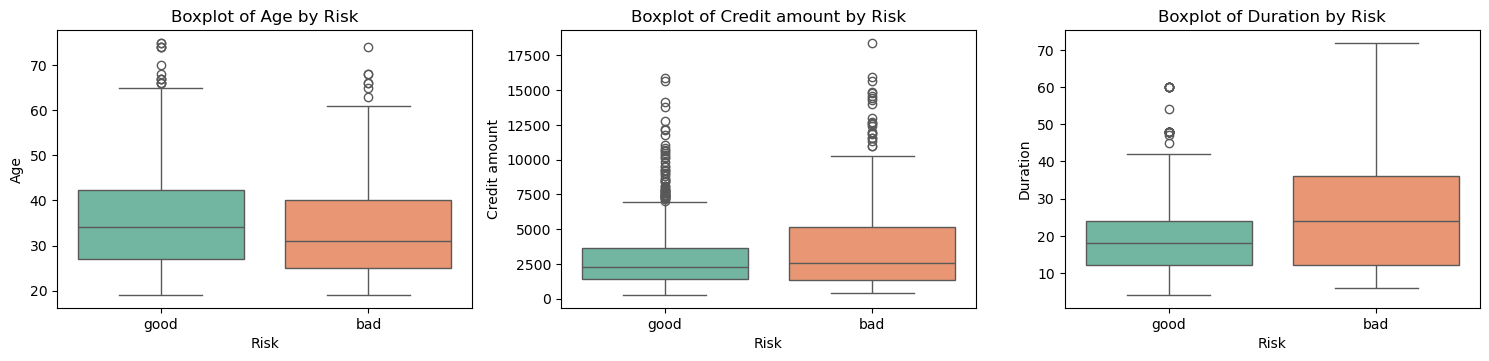

In [29]:
# Select only continuous (numeric) columns
continuous_columns = data.select_dtypes(include=['float', 'int']).columns

# Create boxplots for continuous variables by outcome
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Risk', y=column, data=data, palette="Set2")
    plt.title(f'Boxplot of {column} by Risk')
plt.tight_layout()
plt.show()

### Removing Outliers: Since Some Machine Modelling Techniques Are Sensitive To Outliers

In [30]:
# Define a function to remove outliers using IQR
def remove_outliers(data, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the dataframe to exclude outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data

# Select only continuous (numeric) columns
continuous_columns = data.select_dtypes(include=['float', 'int']).columns

# Remove outliers from continuous variables
data = remove_outliers(data, continuous_columns)

In [31]:
data.shape

(861, 10)

In [32]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

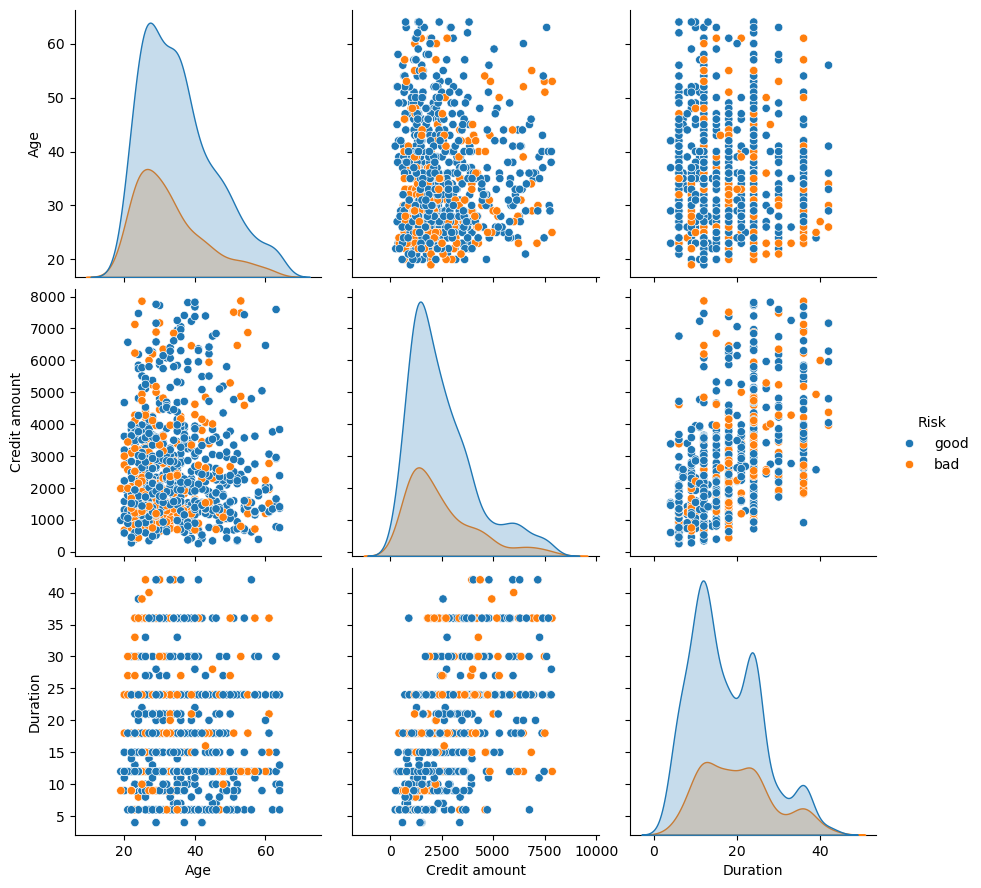

In [33]:
sns.pairplot(data, hue="Risk", size=3)

### Transforming the data into Dummy variables

In [34]:
cat_col=data.select_dtypes('object').columns.tolist()

In [35]:
cat_col

['Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Purpose',
 'Risk']

In [36]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder with sparse_output=False to get a dense array
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoder.fit_transform(data[cat_col])

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [37]:
encoded_cols = encoder.get_feature_names_out(cat_col)

In [38]:
encoded_cols

array(['Sex_female', 'Sex_male', 'Job_highly skilled', 'Job_skilled',
       'Job_unskilled and non-resident', 'Job_unskilled and resident',
       'Housing_free', 'Housing_own', 'Housing_rent',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others', 'Risk_bad',
       'Risk_good'], dtype=object)

In [39]:
#Adding transformed columns to the data
data[encoded_cols] = encoder.transform(data[cat_col])

In [40]:
#Displaying first 3 rows
data.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
2,49,male,unskilled and resident,own,little,little,2096,12,education,good,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,male,skilled,free,little,little,4870,24,car,bad,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,53,male,skilled,own,quite rich,little,2835,24,furniture/equipment,good,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [41]:
#Dropping categorical columns from the data
data.drop(columns=cat_col, inplace=True)

In [42]:
data.head(3)

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_highly skilled,Job_skilled,Job_unskilled and non-resident,Job_unskilled and resident,Housing_free,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
2,49,2096,12,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,4870,24,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,53,2835,24,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [43]:
# Separating the explanatory variables and the response variable
X = data.drop(columns=['Risk_bad', 'Risk_good'])
y = data[['Risk_bad', 'Risk_good']]

In [44]:
X.head(3)

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_highly skilled,Job_skilled,Job_unskilled and non-resident,Job_unskilled and resident,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
2,49,2096,12,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,53,4870,24,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,53,2835,24,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
y.head(3)

,Risk_bad,Risk_good
2,0.0,1.0
4,1.0,0.0
6,0.0,1.0


### Scaling Variables

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [47]:
X[:] = scaler.transform(X)

In [48]:
X.head(3)

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_highly skilled,Job_skilled,Job_unskilled and non-resident,Job_unskilled and resident,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
2,0.666667,0.242416,0.210526,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.755556,0.606697,0.526316,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.755556,0.339462,0.526316,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Dividing dataset into train dataset and test dataset

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [50]:
#Exploring the shapes for train and test datasets for both the explanatory and the response (Risk) variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((688, 27), (173, 27), (688, 2), (173, 2))

# Model Evaluation

In [51]:
# Convert y_train and y_test to 1D arrays since the response(Risk) has two leves (bad, good)
if len(y_train.shape) > 1 and y_train.shape[1] == 2:
    y_train = y_train.iloc[:, 0] if hasattr(y_train, 'iloc') else y_train[:, 0]
if len(y_test.shape) > 1 and y_test.shape[1] == 2:
    y_test = y_test.iloc[:, 0] if hasattr(y_test, 'iloc') else y_test[:, 0]

In [52]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [54]:
# Create an empty dictionary to store the results
results = {}

In [55]:
# Loop over each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

In [56]:
# Display the results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])


Model: Logistic Regression
Accuracy: 0.75
Precision: 0.86
Recall: 0.12
F1 Score: 0.22
Confusion Matrix:
[[124   1]
 [ 42   6]]

Model: Decision Tree
Accuracy: 0.60
Precision: 0.32
Recall: 0.42
F1 Score: 0.36
Confusion Matrix:
[[83 42]
 [28 20]]

Model: Random Forest
Accuracy: 0.75
Precision: 0.60
Recall: 0.31
F1 Score: 0.41
Confusion Matrix:
[[115  10]
 [ 33  15]]

Model: Support Vector Machine
Accuracy: 0.72
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[125   0]
 [ 48   0]]

Model: K-Nearest Neighbors
Accuracy: 0.69
Precision: 0.38
Recall: 0.21
F1 Score: 0.27
Confusion Matrix:
[[109  16]
 [ 38  10]]
